In [ ]:
import json
import re
from datetime import datetime

class CitationLogger:
    def __init__(self, author, title, repo_url, year=None):
        self.author = author
        self.title = title
        self.repo_url = repo_url
        self.year = year or datetime.now().year
        self.bib_key = self._generate_bib_key()

    def _generate_bib_key(self):
        first = re.sub(r'[^a-zA-Z]', '', self.author.split()[0].lower())
        title_token = re.sub(r'[^a-zA-Z]', '', self.title.split()[0].lower())
        return f"{first}{self.year}{title_token}"

    def markdown(self):
        return f"""### Citation  
{self.author} ({self.year}). *{self.title}*. GitHub Repository: [{self.repo_url.split('/')[-1]}]({self.repo_url})
"""

    def bibtex(self):
        return f"""@misc{{{self.bib_key},
  author       = {{{self.author}}},
  title        = {{{self.title}}},
  year         = {{{self.year}}},
  howpublished = {{\\url{{{self.repo_url}}}}},
  note         = {{GitHub Repository}}
}}"""

    def json(self):
        return {
            "author": self.author,
            "year": self.year,
            "title": self.title,
            "repository": "GitHub",
            "url": self.repo_url
        }

    def display(self):
        print(" Markdown Citation:\n")
        print(self.markdown())
        print("\n BibTeX Citation:\n")
        print(self.bibtex())
        print("\n JSON Citation:\n")
        print(json.dumps(self.json(), indent=4))

citation = CitationLogger(
    author="Nouri Baher",
    title="Hybrid Oversampling for Intrusion Detection: SMOTE + KGSMOTE",
    repo_url="https://github.com/Nouribaher/ids-hybrid-oversampling-smote-kgsmote",
    year=2025
)

citation.display()

439/439 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

 NOURI BAHER ----- Accuracy: 0.9907
Classification report saved to 'Evaluation_Classification_Report.xlsx'
Confusion matrix saved to 'Evaluation_Confusion_Matrix.xlsx'
 SHAP summary plot saved to 'SHAP_Summary_Plot.png'
Aggregated SHAP values saved to 'SHAP_Values_MeanAcrossClasses.xlsx'
SHAP values per class saved to 'SHAP_Values_Class*.xlsx'


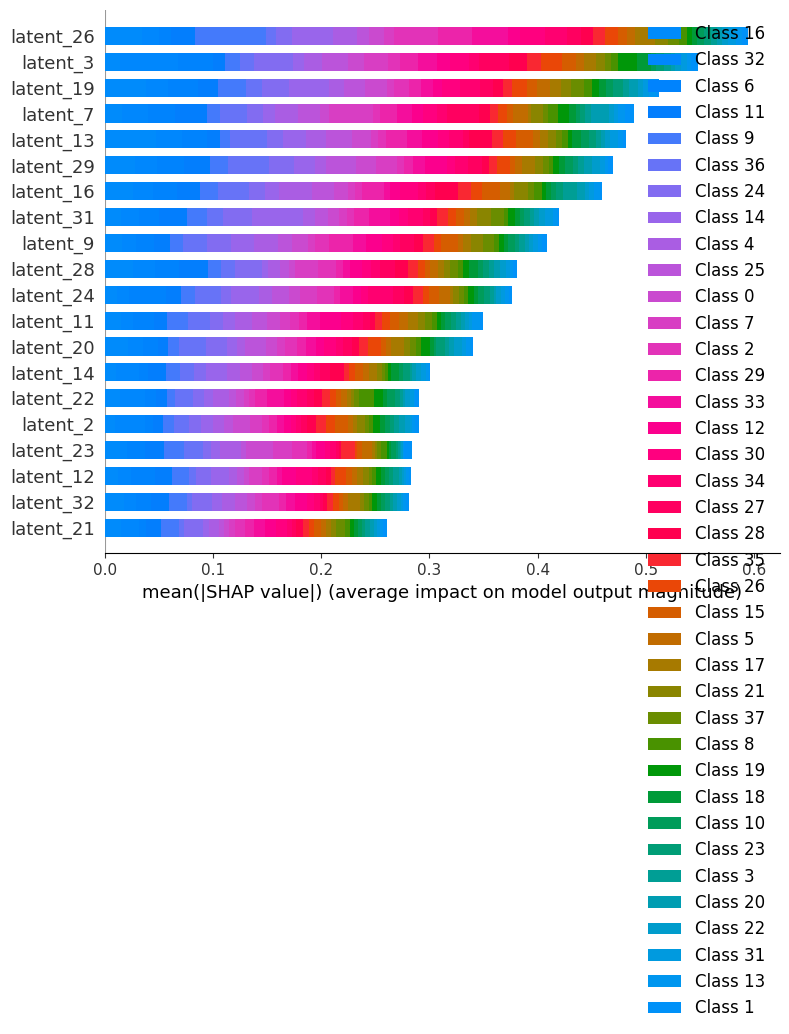

In [23]:
# Evaluator – SHAP, Confusion Matrix, and Excel Reports

import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings

#  Suppress Warnings for Clean Output

warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)


#  Load Compressed Features and Labels

X_df = pd.read_excel("compressed-Hybrid_Balanced-Denoising.xlsx", sheet_name="Compressed_Features", engine="openpyxl")
y_df = pd.read_excel("results-Hybrid_Balanced.xlsx", engine="openpyxl")
y_raw = y_df['label_name'].values


# Encode Labels

le = LabelEncoder()
y = le.fit_transform(y_raw)
class_names = list(le.classes_)


# SPrepare Feature Matrix

X = X_df.select_dtypes(include=[np.number]).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#  Load Trained Model

model = load_model("DAE_Neural_Classifier.h5")


# Predict and Evaluate

y_pred = np.argmax(model.predict(X_test), axis=1) # Get the index of the maximum Value
acc = accuracy_score(y_test, y_pred)
print(f"\n NOURI BAHER ----- Accuracy: {acc:.4f}")

# Classification Report
report_dict = classification_report(y_test, y_pred, target_names=class_names, output_dict=True, zero_division=0)
report_df = pd.DataFrame(report_dict).transpose()
report_df.to_excel("Evaluation_Classification_Report.xlsx")
print("Classification report saved to 'Evaluation_Classification_Report.xlsx'")

# Confusion Matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), index=class_names, columns=class_names)
cm.to_excel("Evaluation_Confusion_Matrix.xlsx")
print("Confusion matrix saved to 'Evaluation_Confusion_Matrix.xlsx'")


# SHAP Feature Importance

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test[:100])  # Limit for performance

# SHAP Summary Plot
plt.figure()
shap.summary_plot(shap_values, X_test[:100], feature_names=X_df.columns, show=False)
plt.tight_layout()
plt.savefig("SHAP_Summary_Plot.png")
print(" SHAP summary plot saved to 'SHAP_Summary_Plot.png'")

# SHAP Values Export – Aggregated Across Classes
shap_mean = np.mean(np.abs(shap_values.values), axis=2)  # shape: (samples, features)
shap_df = pd.DataFrame(shap_mean, columns=X_df.columns)
shap_df.to_excel("SHAP_Values_MeanAcrossClasses.xlsx")
print("Aggregated SHAP values saved to 'SHAP_Values_MeanAcrossClasses.xlsx'")

# "Optional" Export SHAP values per class
for i in range(shap_values.values.shape[2]):
    class_df = pd.DataFrame(shap_values.values[:, :, i], columns=X_df.columns)
    class_df.to_excel(f"SHAP_Values_Class{i}.xlsx")
print("SHAP values per class saved to 'SHAP_Values_Class*.xlsx'")

In [22]:
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("DAE_Neural_Classifier.h5")

# View model architecture
model.summary()

# Predict on new data (example)
# X_new should be preprocessed the same way as training data
# y_pred = model.predict(X_new)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 38)                  │           1,254 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,448 (21.29 KB)

 Trainable params: 5,446 (21.27 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load label column
y_df = pd.read_excel("results-Hybrid_Balanced.xlsx", engine="openpyxl")
y_raw = y_df['label_name'].values

# Rebuild encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_raw)

# Create mapping table
label_map = pd.DataFrame({
    "Class Index": range(len(le.classes_)),
    "Label Name": le.classes_
})
print(label_map)

    Class Index  Label Name
0             0    0.000000
1             1    0.027027
2             2    0.054054
3             3    0.081081
4             4    0.108108
5             5    0.135135
6             6    0.162162
7             7    0.189189
8             8    0.216216
9             9    0.243243
10           10    0.270270
11           11    0.297297
12           12    0.324324
13           13    0.351351
14           14    0.378378
15           15    0.405405
16           16    0.432432
17           17    0.459459
18           18    0.486486
19           19    0.513514
20           20    0.540541
21           21    0.567568
22           22    0.594595
23           23    0.621622
24           24    0.648649
25           25    0.675676
26           26    0.702703
27           27    0.729730
28           28    0.756757
29           29    0.783784
30           30    0.810811
31           31    0.837838
32           32    0.864865
33           33    0.891892
34           34    0

In [20]:
y_df = pd.read_excel("compressed-Hybrid_Balanced.xlsx", engine="openpyxl")
y_raw = y_df['label_name'].values

print(f"Total unique labels in file: {len(set(y_raw))}")

Total unique labels in file: 38
